In [54]:
# ! pip install requests
# ! pip install matplotlib
import requests
import json
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def get_data():
    # With requests, we can ask the web service for the data.
    # Can you understand the parameters we are passing here?
    response = requests.get(
        "http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
        params={
            'starttime': "2000-01-01",
            "maxlatitude": "58.723",
            "minlatitude": "50.008",
            "maxlongitude": "1.67",
            "minlongitude": "-9.756",
            "minmagnitude": "1",
            "endtime": "2018-10-11",
            "orderby": "time-asc"}
    )

    # The response we get back is an object with several fields.
    # The actual contents we care about are in its text field:
    #text = response.text
    Data = response.json()

    return Data

In [6]:
earthquakes = get_data()

In [7]:
print(type(earthquakes))

<class 'dict'>


In [9]:
earthquakes['features'][0]

{'type': 'Feature',
 'properties': {'mag': 2.6,
  'place': '12 km NNW of Penrith, United Kingdom',
  'time': 956553055700,
  'updated': 1415322596133,
  'tz': None,
  'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009rst',
  'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp0009rst&format=geojson',
  'felt': None,
  'cdi': None,
  'mmi': None,
  'alert': None,
  'status': 'reviewed',
  'tsunami': 0,
  'sig': 104,
  'net': 'us',
  'code': 'p0009rst',
  'ids': ',usp0009rst,',
  'sources': ',us,',
  'types': ',impact-text,origin,phase-data,',
  'nst': None,
  'dmin': None,
  'rms': None,
  'gap': None,
  'magType': 'ml',
  'type': 'earthquake',
  'title': 'M 2.6 - 12 km NNW of Penrith, United Kingdom'},
 'geometry': {'type': 'Point', 'coordinates': [-2.81, 54.77, 14]},
 'id': 'usp0009rst'}

In [19]:

def get_year(earthquake):
    """Retrieve the time of an eartquake. Convert from Unix Timestamp"""
    unix_time_ms = earthquake['properties']['time']
    time_sec = unix_time_ms / 1000 # convert from miliseconds to seconds
    date_time = datetime.datetime.utcfromtimestamp(time_sec)  # Convert to a datetime object in UTC
    year = date_time.year
    return year


get_year(earthquakes['features'][0])


2000

In [38]:
def get_yearly_frequency(earthquakes):

    frequency_dict = {}

    for earthquake in  earthquakes['features']:
        year = get_year(earthquake)
        # print(year)
        if year not in frequency_dict:
            frequency_dict[year] = 1
        else:
            frequency_dict[year] += 1
    return frequency_dict

frequency_dict = get_yearly_frequency(earthquakes)
print(frequency_dict)


{2000: 3, 2001: 9, 2002: 21, 2003: 5, 2004: 6, 2005: 10, 2006: 10, 2007: 16, 2008: 9, 2009: 3, 2010: 1, 2011: 4, 2013: 6, 2014: 3, 2015: 5, 2017: 2, 2018: 7}


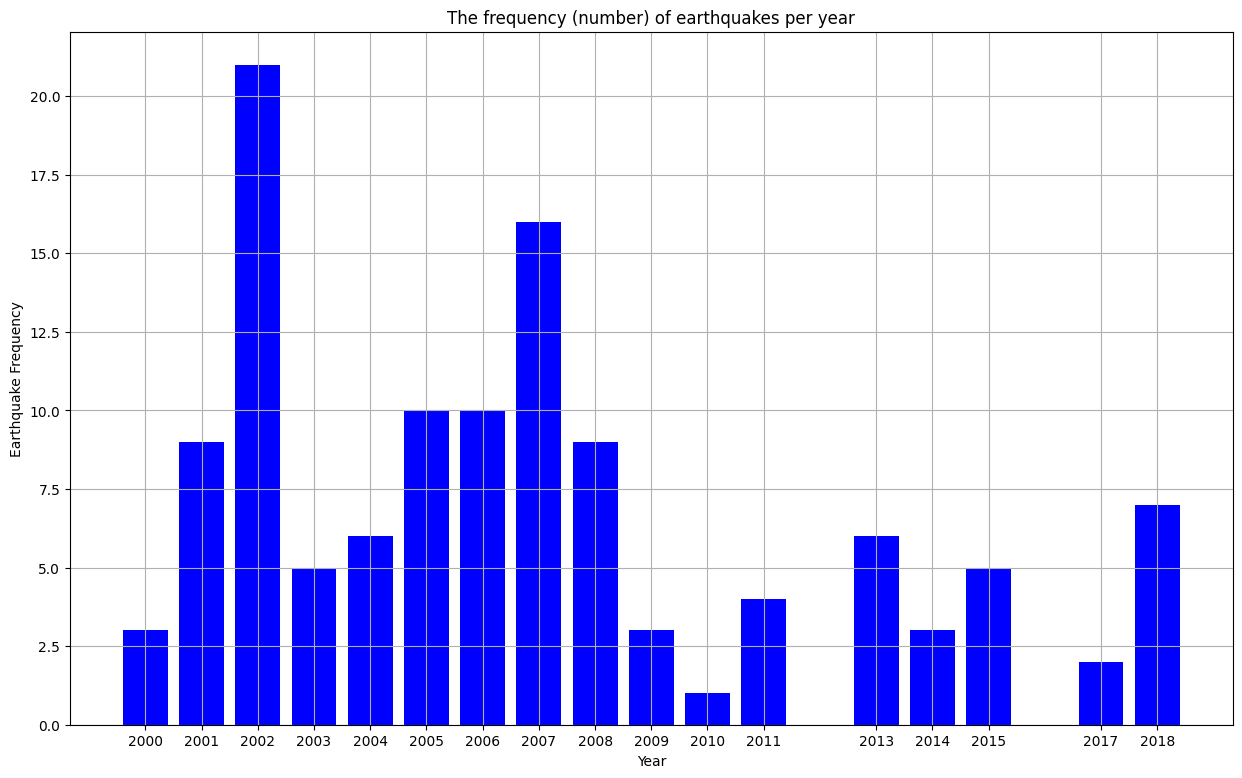

120


In [39]:
total=0
plt.figure(figsize=(15,9))
year_labels=[]
for year, freq in frequency_dict.items():
    total += freq
    plt.bar(year, freq, label = year, color='blue')
    year_labels.append(year)
# plt.legend()
plt.xticks(year_labels)
plt.xlabel('Year')
plt.ylabel('Earthquake Frequency')
plt.title('The frequency (number) of earthquakes per year')
plt.grid(True)
plt.show()

print(total)


In [47]:
# the average magnitude of earthquakes per year


def get_magnitude(earthquake):
    """Retrive the magnitude of an earthquake item."""
    magnitude = earthquake['properties']['mag']
    return magnitude



def get_yearly_magnitudes(earthquakes):
    mag_dict = {}

    for earthquake in  earthquakes['features']:
        year = get_year(earthquake)
        # print(year)
        if year not in mag_dict:
            mag_dict[year] = [get_magnitude(earthquake)]
        else:
            mag_dict[year].append(get_magnitude(earthquake))

    average_mag={}
    for year, list in mag_dict.items():
        average_mag[year] = round(sum(list)/len(list),2)

    return average_mag


print(get_yearly_magnitudes(earthquakes))

{2000: 3.53, 2001: 3.17, 2002: 3.09, 2003: 2.76, 2004: 3.28, 2005: 2.72, 2006: 2.67, 2007: 2.11, 2008: 3.1, 2009: 3.4, 2010: 3.5, 2011: 3.43, 2013: 2.98, 2014: 3.4, 2015: 3.24, 2017: 3.2, 2018: 3.06}


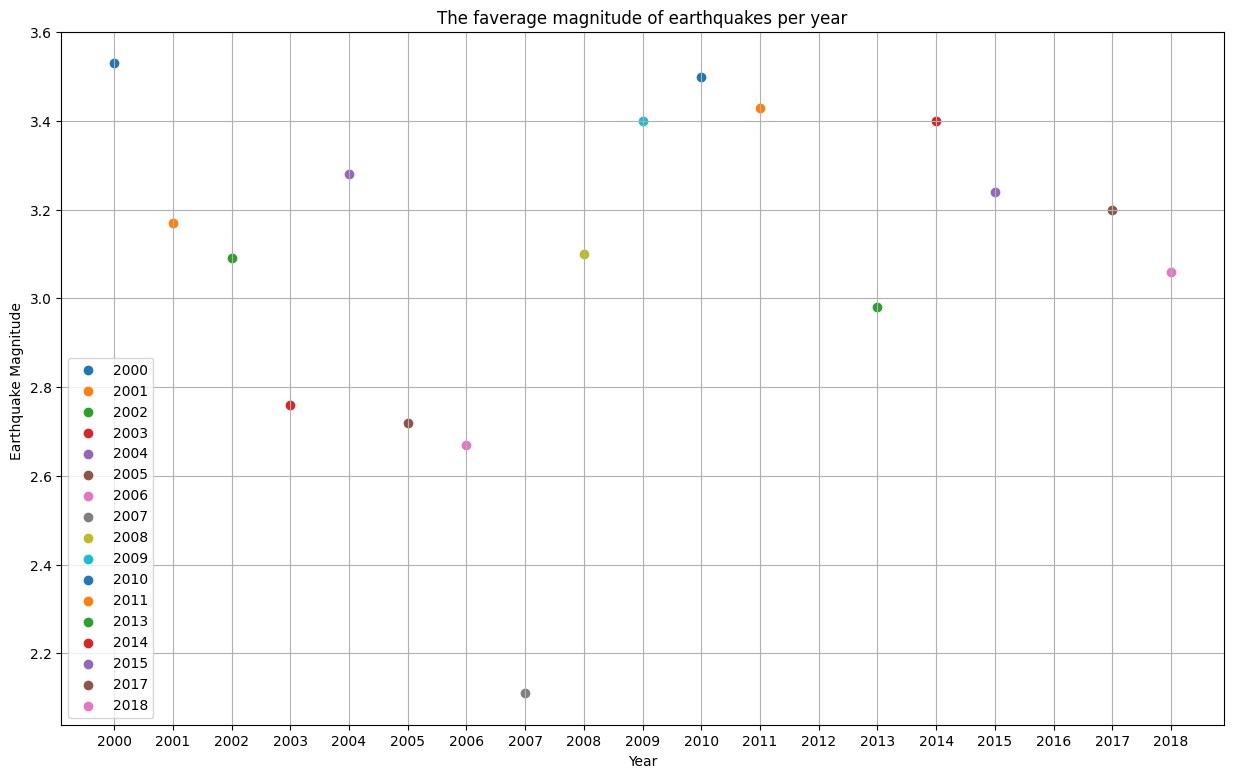

In [56]:
plt.figure(figsize=(15,9))
years=[]
for year, average in get_yearly_magnitudes(earthquakes).items():
    plt.scatter(year, average, label =year)
    years.append(year)
plt.legend()
plt.xticks(np.arange(2000,2019))
plt.xlabel('Year')
plt.ylabel('Earthquake Magnitude ')
plt.title('The faverage magnitude of earthquakes per year')
plt.grid(True)
plt.show()